In [3]:
# 1 Import essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 2  Load the Airbnb dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('./Resources/Airbnb.csv')

In [5]:
#Print the first 20 rows of the dataset to get an initial understanding of its structure and content.
df.head(30)

,id,name,host_id,host_name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number_of_reviews,last review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49,10/5/2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160,6/9/2019,1.33,4,188


In [6]:
# 3 Find out the shape of dataset and what does it indicate?
df.shape
#48900 observations and 16 features

(48900, 16)

In [7]:
# 4 List all column names and replace spaces in column labels with underscores “ _ “ for consistency and ease of use.
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood group',
       'neighbourhood', 'latitude', 'longitude', 'room type', 'price',
       'minimum nights', 'number_of_reviews', 'last review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
# 5  Replace spaces in column labels with underscores
df.columns = df.columns.str.replace(' ', '_')

# List all updated column names
updated_columns = df.columns.tolist()
print("Updated Columns:", updated_columns)

Updated Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [9]:
# 6 Check the data types of each attribute to understand what type of data each column holds
data_types = df.dtypes

# Print the data types
print("Data Types of Each Column:")
print(data_types)

Data Types of Each Column:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [10]:
# 7 Convert the minimum_night and price columns from float to integer types after removing any non-numeric
#characters (e.g., currency symbols). Convert last_review to a datetime type.

# Remove non-numeric characters from the 'price' column and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'price' and 'minimum_night' columns to integer type
df['price'] = df['price'].astype(int)
df['minimum_nights'] = df['minimum_nights'].astype(int)

# Convert 'last_review' column to datetime type
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Display the updated DataFrame dtypes
print("Updated Data Types:")
print(df.dtypes)

Updated Data Types:
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int32
minimum_nights                             int32
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\AT\AppData\Local\Temp\ipykernel_20388\72803324.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
# 8 Share the information of dataset. What is the importance of it in EDA?
# The dataset is about houses. The importance of this dataset is to undersand the patterns of data,missing values,visualize the corelations, feature engineering and make prediction based on this dataset

In [12]:
# 9 Provide summary statistics for numerical columns. Highlight any unusual calculation you find (If any)
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.890000e+04,4.890000e+04,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,38848,38848.000000,48900.000000,48900.000000
mean,1.901520e+07,6.761310e+07,40.728949,-73.952172,152.720511,7.032168,23.279693,2018-10-04 02:02:57.182866432,1.373126,7.143374,112.783742
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.470353e+06,7.812758e+06,40.690100,-73.983072,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.967620e+07,3.079058e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,2.915173e+07,1.074344e+08,40.763112,-73.936280,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098423e+07,7.860992e+07,0.054529,0.046155,240.142704,20.513684,44.555777,NaN,1.680367,32.950889,131.626347


array([[<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>]],
      dtype=object)

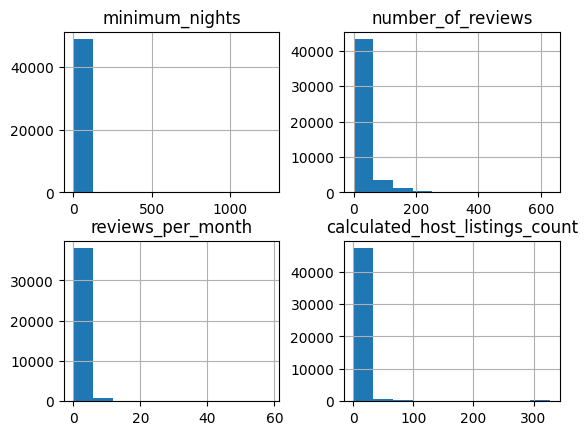

In [13]:
# 9 Provide summary statistics for categorical columnsHighlight any unusual calculation you find (If
df[['minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count']].hist()


In [14]:
#10 summary stats of categorical columns
categorical=df.describe(include='object')
categorical

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,48884,48879,48900,48900,48900
unique,47896,11452,6,221,3
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,18,417,21664,3920,25413


In [15]:
# 11  Identify duplicate rows in the dataset and remove them to ensure data integrity.
duplicates=df[df.duplicated()]
duplicates

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
12,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
13,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
19,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
21,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,2019-06-28,1.72,1,321


In [16]:
# 12  Check each column for null or empty values to understand the extent of missing data.
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
(df.isnull().sum())/len(df)*100

id                                 0.000000
name                               0.032720
host_id                            0.000000
host_name                          0.042945
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.556237
reviews_per_month                 20.556237
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [18]:
# 13 Replace null values in columns with suitable replacements
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace= True)
df.head(5)

C:\Users\AT\AppData\Local\Temp\ipykernel_20388\4108852413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace= True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [19]:
# 14 Drop columns (last reviews, names and id)
df.drop(columns=['id','name','last_review'],inplace = True)

In [20]:
df.isnull().sum()

host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [21]:
# mode imputation to at host_name
df['host_name'].fillna(df['host_name'].mode()[0], inplace=True)

C:\Users\AT\AppData\Local\Temp\ipykernel_20388\579343510.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_name'].fillna(df['host_name'].mode()[0], inplace=True)


In [22]:
# Find number of unique values for the columns ‘room type’, 'neighbourhood_group' and 'neighbourhood'.
#Highlight the unusual answer if any and tackle with it.

df[['room_type','neighbourhood_group','neighbourhood']].nunique()

room_type                3
neighbourhood_group      6
neighbourhood          221
dtype: int64

In [23]:
# 16 What are the top 10 host IDs with the highest number of bookings?

# Count the number of bookings for each host
booking_counts = df.groupby('host_id').size()

# Convert the Series to a DataFrame and sort it in descending order
booking_counts_df = booking_counts.reset_index(name='calculated_host_listings_count')
booking_counts_df = booking_counts_df.sort_values(by='calculated_host_listings_count', ascending=False)

# Get the top 10 host IDs with the highest number of bookings
top_10_hosts = booking_counts_df.head(10)

print("Top 10 host IDs with the highest number of bookings:")
print(top_10_hosts)


Top 10 host IDs with the highest number of bookings:
         host_id  calculated_host_listings_count
34646  219517861                             327
29407  107434423                             232
19574   30283594                             121
31079  137358866                             103
14436   16098958                              96
12806   12243051                              96
25662   61391963                              91
17091   22541573                              87
33868  200380610                              65
9732     7503643                              52


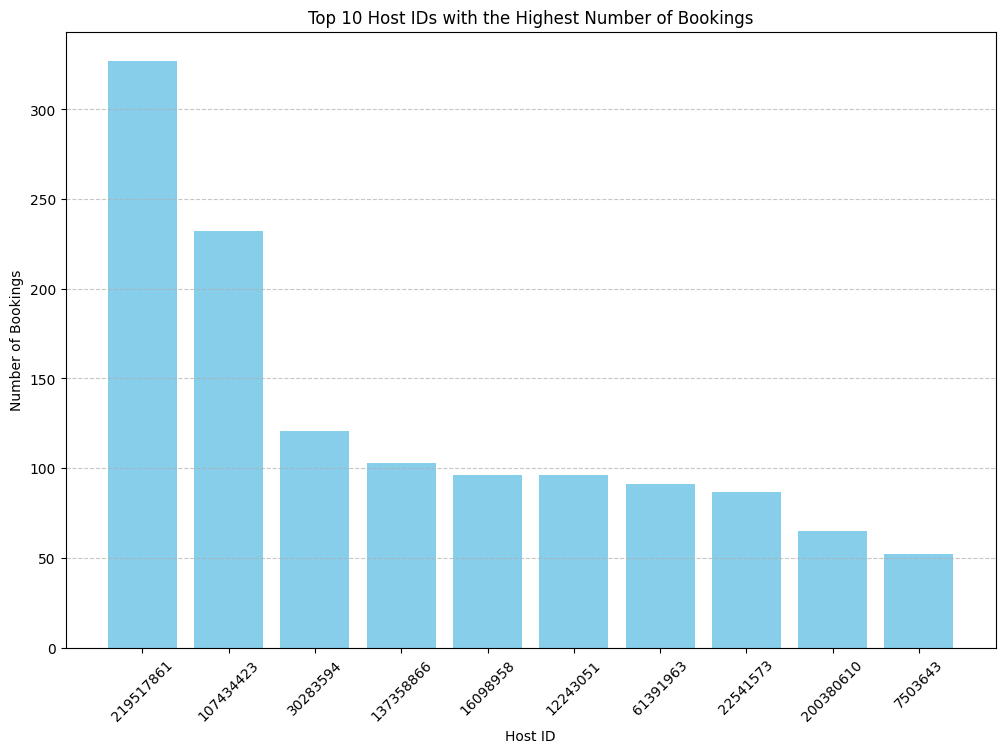

In [24]:
# Plotting
plt.figure(figsize=(12, 8))
plt.bar(top_10_hosts['host_id'].astype(str), top_10_hosts['calculated_host_listings_count'], color='skyblue')
plt.xlabel('Host ID')
plt.ylabel('Number of Bookings')
plt.title('Top 10 Host IDs with the Highest Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

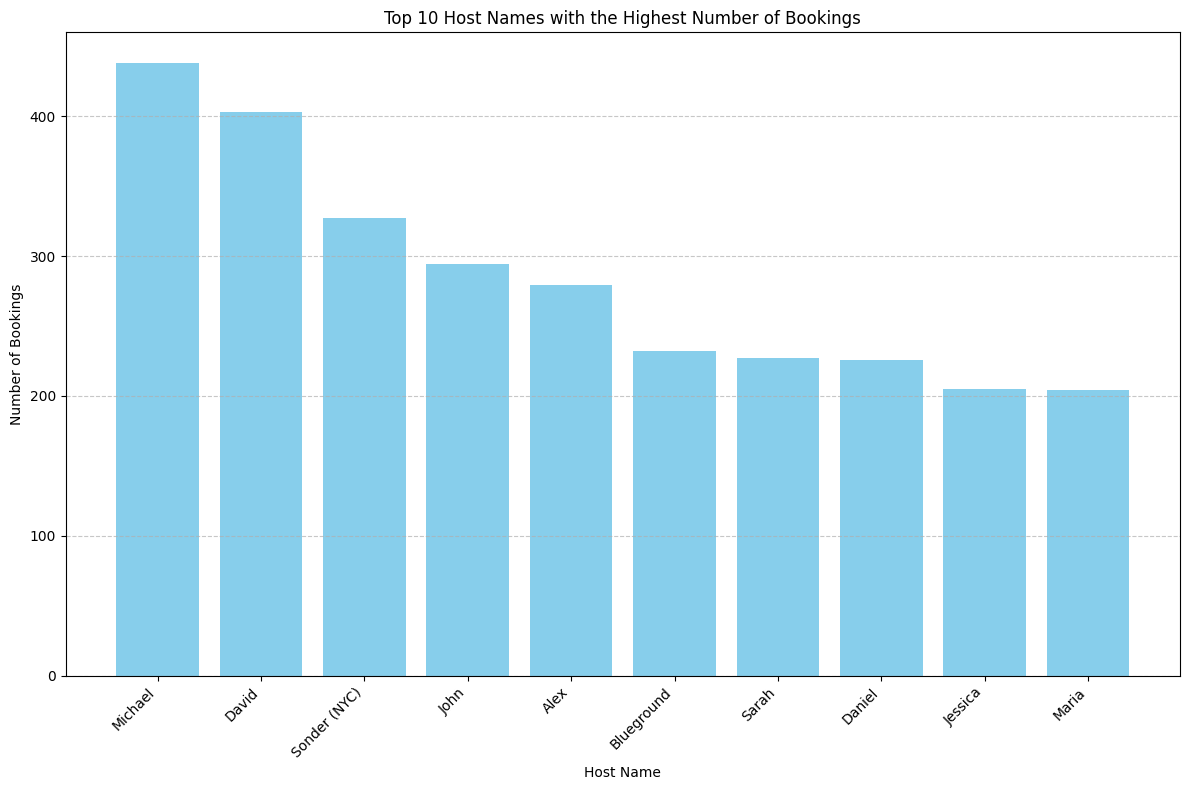

In [25]:
# Count the number of bookings for each host name
booking_counts = df.groupby('host_name').size()

# Convert the Series to a DataFrame and sort it in descending order
booking_counts_df = booking_counts.reset_index(name='calculated_host_listings_count')
booking_counts_df = booking_counts_df.sort_values(by='calculated_host_listings_count', ascending=False)

# Get the top 10 host names with the highest number of bookings
top_10_hosts = booking_counts_df.head(10)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(top_10_hosts['host_name'], top_10_hosts['calculated_host_listings_count'], color='skyblue')
plt.xlabel('Host Name')
plt.ylabel('Number of Bookings')
plt.title('Top 10 Host Names with the Highest Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





In [26]:


# Find the host_id with the highest number of bookings (based on 'calculated_host_listings_count')
top_host_id = df.groupby('host_id')['calculated_host_listings_count'].sum().idxmax()

# Fetch the rows corresponding to this host_id
top_host_data = df.loc[df['host_id'] == top_host_id]

# Determine the unique room types offered by this host
room_types = top_host_data['room_type'].unique()

# Calculate the price range for these rooms
min_price = top_host_data['price'].min()
max_price = top_host_data['price'].max()

# Output the results
print(f"Host ID with the highest number of bookings: {top_host_id}")
print(f"Room types offered by this host: {room_types}")
print(f"Price range for these rooms: ${min_price} - ${max_price}")


Host ID with the highest number of bookings: 219517861
Room types offered by this host: ['Entire home/apt' 'Private room']
Price range for these rooms: $100 - $699


Neighbourhood group with the highest number of bookings: Manhattan with 21664 bookings


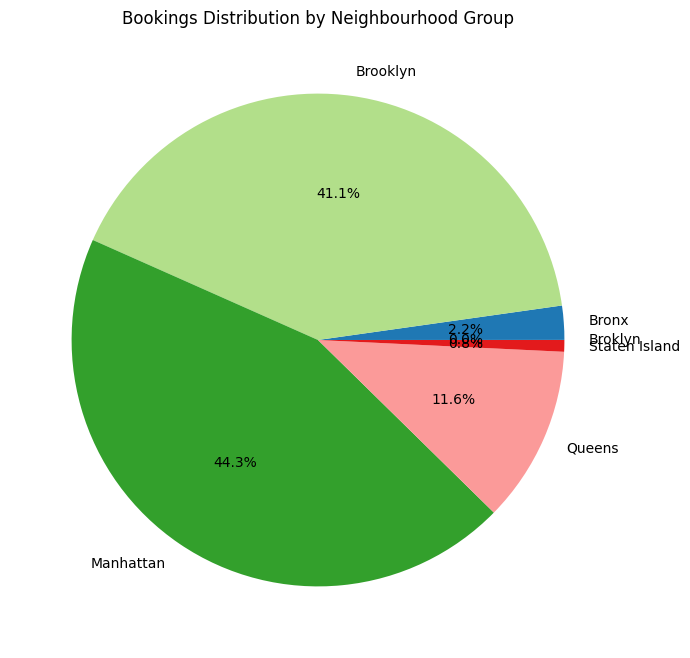

In [27]:
# Group by neighbourhood group and count the number of bookings (listings)
neighbourhood_group_bookings = df.groupby('neighbourhood_group').size()

# Identify the neighbourhood group with the highest number of bookings
top_neighbourhood_group = neighbourhood_group_bookings.idxmax()
top_bookings_count = neighbourhood_group_bookings.max()

print(f"Neighbourhood group with the highest number of bookings: {top_neighbourhood_group} with {top_bookings_count} bookings")

# Visualize the data using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(neighbourhood_group_bookings, labels=neighbourhood_group_bookings.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Bookings Distribution by Neighbourhood Group')
plt.show()


In [28]:
average_price = df['price'].mean() # calculate average price of all listings
print(average_price)

152.72051124744377


In [29]:
# Determine the minimum and maximum prices of the listings in the dataset.
minimum_price = df['price'].min()
maximum_price = df['price'].max()
print('Minimum price of the listings are : ',minimum_price)
print('Maximum price of the listings are : ',maximum_price)

Minimum price of the listings are :  0
Maximum price of the listings are :  10000


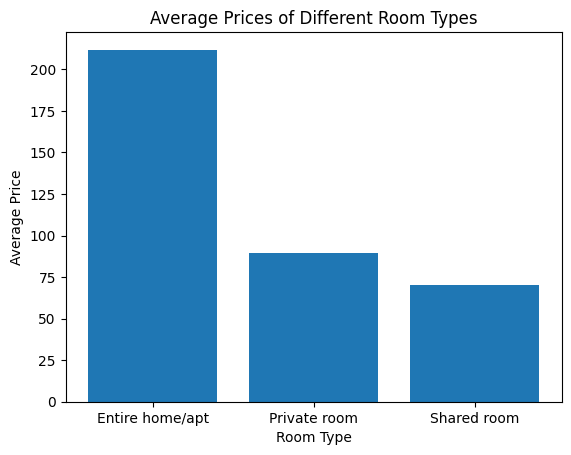

In [30]:
# Compare the average prices of different room types to see how they vary.
room_type= df.groupby('room_type')['price'].mean()
plt.bar(room_type.index, room_type.values)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Prices of Different Room Types')
plt.show()


In [31]:
df.groupby('neighbourhood_group')['number_of_reviews'].max()

neighbourhood_group
Broklyn           74
Bronx            321
Brooklyn         488
Manhattan        607
Queens           629
Staten Island    333
Name: number_of_reviews, dtype: int64

In [33]:

# Calculate total number of bookings
total_bookings = df['number_of_reviews'].sum()

print(f'Total number of bookings: {total_bookings}')

Total number of bookings: 1138377
